# Spaceship Titanic

## Description

### Overview

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

![](https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg)

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

### Evaluation

Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.
Submission Format

The submission format for the competition is a csv file with the following format:

```
PassengerId,Transported
0013_01,False
0018_01,False
0019_01,False
0021_01,False
etc.
```

## Data Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.    
  * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  
  * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.  
  * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
  * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  
  * Destination - The planet the passenger will be debarking to.
  * Age - The age of the passenger.  
  * VIP - Whether the passenger has paid for special VIP service during the voyage.  
  * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
  * Name - The first and last names of the passenger.  
  * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  
        
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
    
**sample_submission.csv** - A submission file in the correct format.  
  * PassengerId - Id for each passenger in the test set.  
  * Transported - The target. For each passenger, predict either True or False.  


In [31]:
import pandas as pd
import numpy as npy
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv('./data/train.csv')
train['N'] = 1

In [22]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,N
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


In [21]:
pd.pivot_table(data = train, 
               index = ['HomePlanet'], 
               aggfunc = {'Transported':npy.mean})

,Transported
HomePlanet,
Earth,0.423946
Europa,0.658846
Mars,0.523024


In [23]:
pd.pivot_table(data = train, 
               index = ['CryoSleep'], 
               aggfunc = {'Transported':npy.mean})

,Transported
CryoSleep,
False,0.328921
True,0.817583


In [24]:
pd.pivot_table(data = train, 
               index = ['Destination'], 
               aggfunc = {'Transported':npy.mean})

,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.471175


In [25]:
pd.pivot_table(data = train, 
               index = ['VIP'], 
               aggfunc = {'Transported':npy.mean})

,Transported
VIP,
False,0.506332
True,0.381910


In [26]:
pd.pivot_table(data = train, 
               index = ['Transported'], 
               aggfunc = {'Age':npy.mean})

,Age
Transported,
False,29.922858
True,27.748834


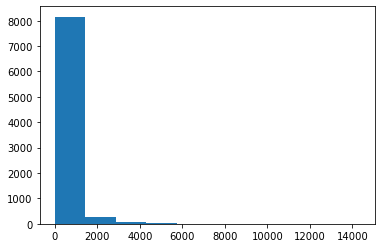

In [34]:
plt.hist(train.RoomService)
plt.show()